In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [5]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
MAXLEN = 200
EMBEDDING_DIMS = 32
VOCAB_SIZE = 10000

train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data, maxlen=MAXLEN, padding='post')

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data, maxlen=MAXLEN, padding='post')

print(len(train_data[0]))
print(len(test_data[0]))

200
200


In [7]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.98:
      print('98% accuracy reached, stopping training.')
      self.model.stop_training = True

callback = MyCallback()

In [8]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIMS, input_length=MAXLEN),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                    epochs=10,
                    validation_data=(test_data, test_labels),
                    callbacks=[callback])

Epoch 1/10
782/782 [==============================] - 272s 342ms/step - loss: 0.6376 - accuracy: 0.6150 - val_loss: 0.4995 - val_accuracy: 0.7984
Epoch 2/10
782/782 [==============================] - 266s 341ms/step - loss: 0.5841 - accuracy: 0.6834 - val_loss: 0.6212 - val_accuracy: 0.6665
Epoch 3/10
782/782 [==============================] - 266s 340ms/step - loss: 0.5682 - accuracy: 0.7099 - val_loss: 0.6008 - val_accuracy: 0.6862
Epoch 4/10
782/782 [==============================] - 266s 341ms/step - loss: 0.5138 - accuracy: 0.7551 - val_loss: 0.4337 - val_accuracy: 0.8160
Epoch 5/10
782/782 [==============================] - 266s 340ms/step - loss: 0.2999 - accuracy: 0.8730 - val_loss: 0.3247 - val_accuracy: 0.8665
Epoch 6/10
782/782 [==============================] - 267s 342ms/step - loss: 0.2136 - accuracy: 0.9173 - val_loss: 0.3217 - val_accuracy: 0.8706
Epoch 7/10
782/782 [==============================] - 266s 340ms/step - loss: 0.1668 - accuracy: 0.9393 - val_loss: 0.3587 -

In [9]:
def plot(history, metric):
  plt.plot(history.history[metric], label=metric)
  plt.plot(history.history['val_'+metric], label='val_'+metric)
  plt.title(metric)
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend()

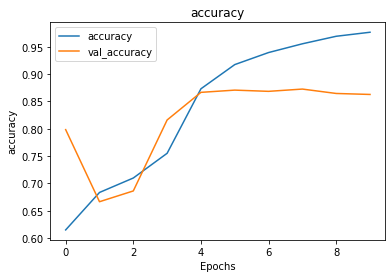

In [11]:
plot(history=history, metric='accuracy')

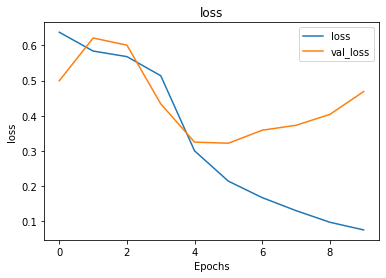

In [12]:
plot(history=history, metric='loss')